In [1]:
%matplotlib inline
import calcRefractiveIndex
from calcRefractiveIndex import refraction as refraction
from calcRefractiveIndex import diff_refraction as diff
from matplotlib import pyplot as plt
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab

In [18]:
reload(calcRefractiveIndex)

<module 'calcRefractiveIndex' from 'calcRefractiveIndex.py'>

In [2]:
def arcsec(var):
    return var * 3600.

In [3]:
def minmax(var):
    return [np.min(var),np.max(var)]

In [4]:
print(calcRefractiveIndex.n_delta(354., 1., 0.02, 20.) )
print(arcsec(refraction(20.,wavelength=354., atmospheric_pressure = 1., water_vapor_pressure = 0.02,
                        temperature = 20. , latitude = -30.244639, altitude = 2663.)))
#print(arcsec(diff(20.,wavelength=354.,bandwidth=66., atmospheric_pressure = 1., 
#                  water_vapor_pressure = 0.02, temperature = 20. , latitude = -30.244639, altitude = 2663.)))

27978.6908907
20.9904089373


In [5]:
base_temp = 10.
temps=np.array(range(100))/3.
temps = base_temp + temps - np.mean(temps)
print(temps.size)
print(minmax(temps))

100
[-6.5, 26.5]


In [6]:
base_pressure = 586.7 # mm Hg
base_pressure_atm=base_pressure / 760.
print(base_pressure_atm)

0.771973684211


In [7]:
pressure_delta = 0.001
pressure_range = 0.1
pressures = ((np.array(range(1+int(2*pressure_range/pressure_delta)))* pressure_delta - pressure_range /2.) 
            * base_pressure_atm + base_pressure_atm)
print(pressures.size)
print(minmax(pressures))

201
[0.733375, 0.88776973684210536]


In [8]:
angle_delta = 0.5
angle_max = 75.
zenith_angles = np.array(range(1+int(angle_max/angle_delta))) * angle_delta 
print(zenith_angles.size)
print(minmax(zenith_angles))

151
[0.0, 75.0]


Now create a 3D array of differential refraction amplitudes as a function of zenith angle, temperature, and pressure

In [9]:
diff_refract_arr = np.zeros([temps.size, zenith_angles.size, pressures.size])

In [10]:
wavelength = 354.
bandwidth = 66.
test = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, temperature = base_temp, 
            atmospheric_pressure = base_pressure_atm)

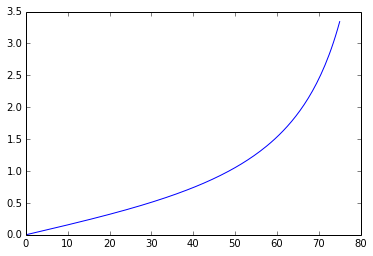

In [11]:
plt.plot(zenith_angles,arcsec(test))

In [12]:
test2 = diff(20., wavelength=wavelength, bandwidth = bandwidth, temperature = temps, 
            atmospheric_pressure = base_pressure_atm)

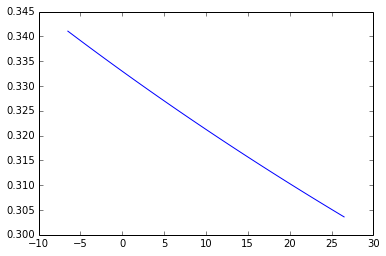

In [13]:
plt.plot(temps,arcsec(test2))

In [14]:
test2W = diff(20., wavelength=wavelength, bandwidth = bandwidth, temperature = 15., 
            atmospheric_pressure = base_pressure_atm, water_vapor_pressure = pressures / 10. - 0.07)

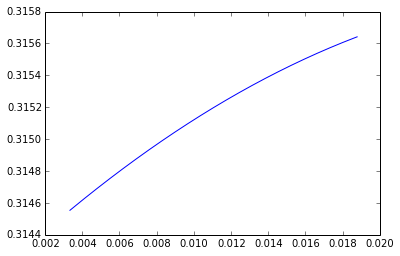

In [15]:
plt.plot(pressures / 10. - 0.07,arcsec(test2W))

In [16]:
test3 = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, temperature = temps, 
            atmospheric_pressure = base_pressure_atm)

In [17]:
for p_i in range(pressures.size):
    diff_refract_arr[:, :, p_i] = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, 
            temperature = temps, atmospheric_pressure = pressures[p_i])

In [18]:
print(diff_refract_arr.shape, type(diff_refract_arr))

((100, 151, 201), <type 'numpy.ndarray'>)


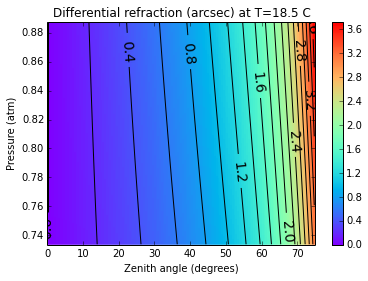

In [20]:
Y = pressures
X = zenith_angles
z_slice = 75
Z = arcsec(diff_refract_arr[z_slice, :, :]).T

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.2)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Zenith angle (degrees)')
ax.set_ylabel('Pressure (atm)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at T=' + str(round(temps[z_slice]*100)/100) + ' C')


cbar=plt.colorbar(fig_show, orientation='vertical', shrink=1)

plt.show()


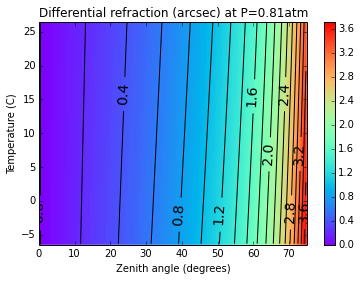

In [21]:
Y = temps
X = zenith_angles
z_slice=100
Z = arcsec(diff_refract_arr[:, :, z_slice])

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.2)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Zenith angle (degrees)')
ax.set_ylabel('Temperature (C)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at P=' + str(round(pressures[z_slice]*100)/100) + 'atm')


cbar=plt.colorbar(fig_show, orientation='vertical', shrink=1)

plt.show()

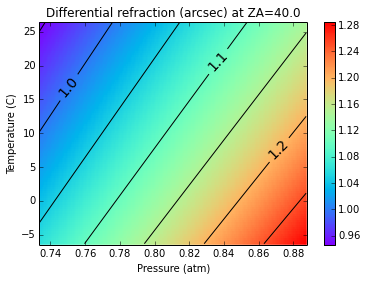

In [22]:
X = pressures
Y = temps
Z = arcsec(diff_refract_arr[:, z_slice, :])
z_slice=80

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.05)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Pressure (atm)')
ax.set_ylabel('Temperature (C)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at ZA=' + str(zenith_angles[z_slice]))


cbar=plt.colorbar(fig_show, orientation='vertical', shrink=1)

plt.show()